<center>
    <h1>
  2024 Formula 1 Season Analysis 
        </h1>
    </center>

---

<center>
    By Vishal Wagadre
</center>

Several datasets from the 2024 Formula 1 season are examined in this project, including the race schedule, drivers, Driver of the Day votes, qualifying and race results, sprint qualifying and sprint race results, and teams. Presenting season-related insights and analyzing important performance factors are the objectives.

---

link for the datasets: https://github.com/toUpperCase78/formula1-datasets

##### Datasets used:  
Formula1_2024season_calendar.csv  
Formula1_2024season_driverOfTheDayVotes.csv  
Formula1_2024season_drivers.csv  
Formula1_2024season_qualifyingResults.csv  
Formula1_2024season_raceResults.csv  
Formula1_2024season_sprintQualifyingResults.csv  
Formula1_2024season_sprintResults.csv  
Formula1_2024season_teams.csv 

___

##### Step 1: Setup and Data Loading


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline (for notebooks)
%matplotlib inline

# Load datasets
race_results = pd.read_csv('Formula1_2024season_raceResults.csv')
drivers = pd.read_csv('Formula1_2024season_drivers.csv')
calendar = pd.read_csv('Formula1_2024season_calendar.csv')
driver_votes = pd.read_csv('Formula1_2024season_driverOfTheDayVotes.csv')
teams = pd.read_csv('Formula1_2024season_teams.csv')

# Initial glimpse of race results
print(race_results.head())

     Track Position  No           Driver                        Team  \
0  Bahrain        1   1   Max Verstappen  Red Bull Racing Honda RBPT   
1  Bahrain        2  11     Sergio Perez  Red Bull Racing Honda RBPT   
2  Bahrain        3  55     Carlos Sainz                     Ferrari   
3  Bahrain        4  16  Charles Leclerc                     Ferrari   
4  Bahrain        5  63   George Russell                    Mercedes   

   Starting Grid  Laps Time/Retired  Points Set Fastest Lap Fastest Lap Time  
0              1    57  1:31:44.742      26             Yes         1:32.608  
1              5    57      +22.457      18              No         1:34.364  
2              4    57      +25.110      15              No         1:34.507  
3              2    57      +39.669      12              No         1:34.090  
4              3    57      +46.788      10              No         1:35.065  


___  
##### Step 2: Data Cleaning & Preprocessing  
1.Convert numeric columns stored as strings to numeric types.  
2.Handle missing or inconsistent values.  
3.Normalize team names across datasets.  
4.Create new calculated columns.  

In [5]:
# Convert numeric columns in race_results to appropriate types
for col in ['Points', 'Position', 'Starting Grid']:
    race_results[col] = pd.to_numeric(race_results[col], errors='coerce')

# Drop rows with missing essential info
race_results_clean = race_results.dropna(subset=['Driver', 'Team', 'Points', 'Position', 'Starting Grid'])

# Normalize team names to align with teams dataset
team_name_map = {
    'Red Bull Racing Honda RBPT': 'Red Bull Racing',
    'McLaren Mercedes': 'McLaren',
    'Aston Martin Aramco Mercedes': 'Aston Martin',
    'Williams Mercedes': 'Williams',
    'Kick Sauber Ferrari': 'Kick Sauber',
    'RB Honda RBPT': 'RB'
}
race_results_clean.loc[:, 'Team'] = race_results_clean['Team'].str.strip().replace(team_name_map)

# Quick check for duplicates or anomalies
print(race_results_clean.duplicated().sum())
print(race_results_clean.info())

0
<class 'pandas.core.frame.DataFrame'>
Index: 431 entries, 0 to 475
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             431 non-null    object 
 1   Position          431 non-null    float64
 2   No                431 non-null    int64  
 3   Driver            431 non-null    object 
 4   Team              431 non-null    object 
 5   Starting Grid     431 non-null    int64  
 6   Laps              431 non-null    int64  
 7   Time/Retired      431 non-null    object 
 8   Points            431 non-null    int64  
 9   Set Fastest Lap   431 non-null    object 
 10  Fastest Lap Time  431 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 40.4+ KB
None


___
##### Step 3: Exploratory Data Analysis (EDA)  
1.Driver Performance Overview  
2.Total points scored by each driver  
3.Number of podium finishes  
4.Fastest laps count  

In [6]:
## Total points per driver
driver_points = race_results_clean.groupby('Driver')['Points'].sum().sort_values(ascending=False)

## Fastest laps count per driver
fastest_laps = race_results_clean[race_results_clean['Set Fastest Lap'] == 'Yes']
fastest_lap_counts = fastest_laps['Driver'].value_counts()

## Total points per team
team_points = race_results_clean.groupby('Team')['Points'].sum().sort_values(ascending=False)

##Quick check
print(driver_points.head(10))
print(fastest_lap_counts.head(10))

Driver
Max Verstappen     399
Lando Norris       344
Charles Leclerc    327
Oscar Piastri      265
Carlos Sainz       262
George Russell     226
Lewis Hamilton     207
Sergio Perez       138
Fernando Alonso     70
Pierre Gasly        40
Name: Points, dtype: int64
Driver
Lando Norris        6
Max Verstappen      3
Charles Leclerc     3
Fernando Alonso     2
George Russell      2
Lewis Hamilton      2
Oscar Piastri       1
Carlos Sainz        1
Sergio Perez        1
Daniel Ricciardo    1
Name: count, dtype: int64


___  
##### Step 4: Vizualizations  
##### 1. Visualize Top Drivers by Points and Fastest Laps

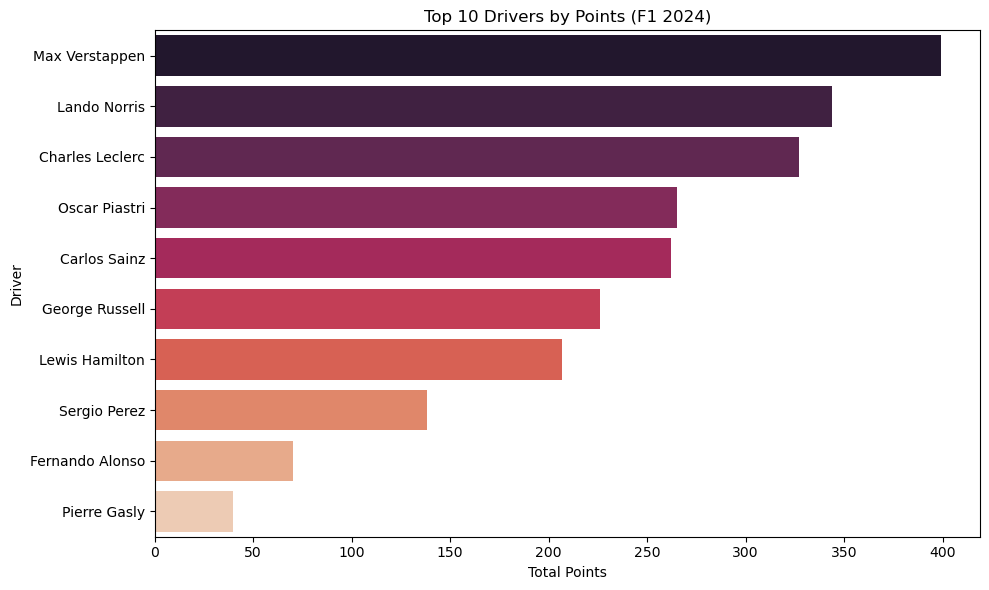

In [7]:
##Top 10 Drivers by Points (F1 2024)

'''plt.figure(figsize=(10,6))
sns.barplot(x=driver_points.head(10).values, y=driver_points.head(10).index, palette='rocket')
plt.title('Top 10 Drivers by Points (F1 2024)')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()'''

##I've provided a new code below rectifying the future warning: Please go through my Future warning explaination at bottom of notebook.
df_top10 = pd.DataFrame({
    'Driver': driver_points.head(10).index,
    'Points': driver_points.head(10).values
})

plt.figure(figsize=(10,6))
sns.barplot(x='Points', y='Driver', data=df_top10, hue='Driver', palette='rocket', dodge=False, legend=False)
plt.title('Top 10 Drivers by Points (F1 2024)')
plt.xlabel('Total Points')
plt.ylabel('Driver')
plt.tight_layout()
plt.savefig('Top 10 Drivers by Points.png', dpi=200, bbox_inches='tight')
plt.show()

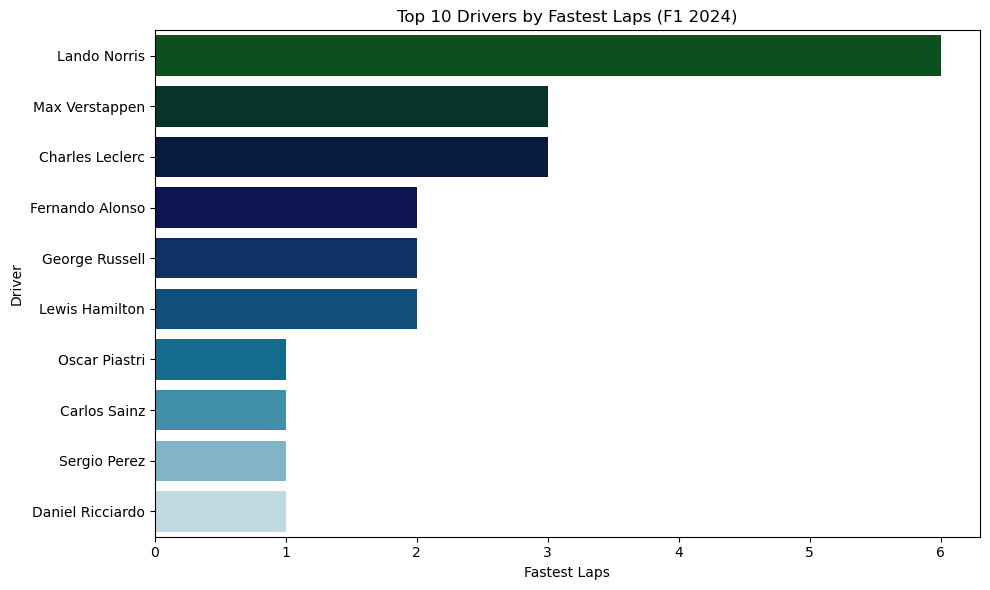

In [8]:
##Top 10 Drivers by Fastest Laps (F1 2024)

'''plt.figure(figsize=(10,6))
sns.barplot(x=fastest_lap_counts.head(10).values, y=fastest_lap_counts.head(10).index, palette='rocket')
plt.title('Top 10 Drivers by Fastest Laps (F1 2024)')
plt.xlabel('Fastest Laps')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()'''

##I've provided a new code below rectifying the future warning: Please go through my Future warning explaination at bottom of notebook.
df_topfast = pd.DataFrame({
	'Driver' : fastest_lap_counts.head(10).index,
	'Fastest Laps' : fastest_lap_counts.head(10).values
})
plt.figure(figsize=(10,6))
sns.barplot(x='Fastest Laps', y='Driver', data=df_topfast, hue='Driver' , palette ='ocean', dodge=False, legend=False)
plt.title('Top 10 Drivers by Fastest Laps (F1 2024)')
plt.xlabel('Fastest Laps')
plt.ylabel('Driver')
plt.tight_layout()
plt.savefig('Top 10 Drivers by Fastest Laps.png', dpi=200, bbox_inches='tight')
plt.show()

___  
##### 2. Team Performance Overview

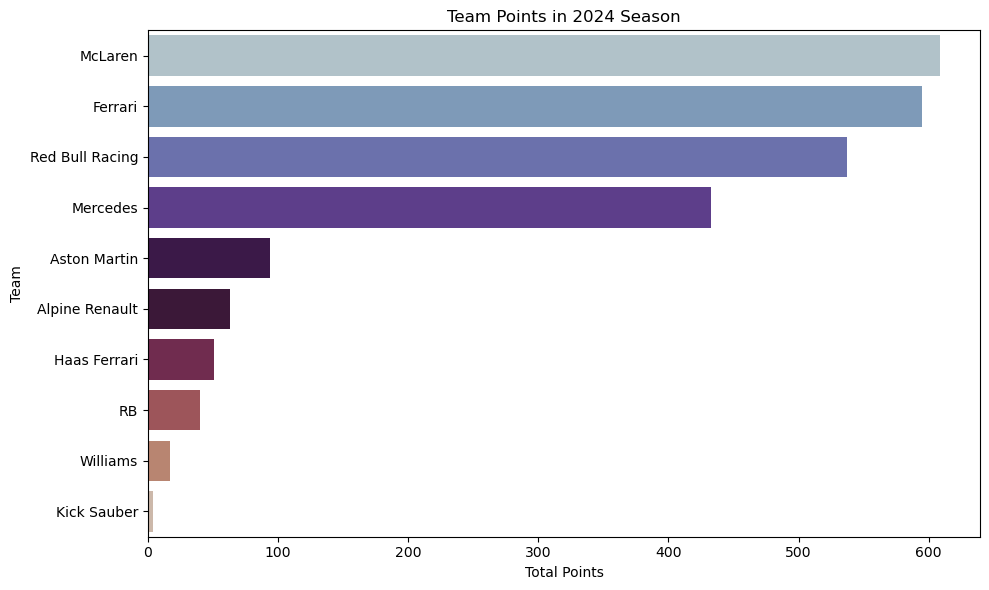

In [9]:
'''plt.figure(figsize=(10,5))
sns.barplot(x=team_points.values, y=team_points.index, palette='mako')
plt.title('Team Points in 2024 Season')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.tight_layout()
plt.show()'''

##I've provided a new code below rectifying the future warning: Please go through my Future warning explaination at bottom of notebook.
df_teamperf = pd.DataFrame({
	'Team' : team_points.index,
	'Total Points' : team_points.values
})
plt.figure(figsize=(10,6))
sns.barplot(x='Total Points', y='Team', data=df_teamperf, hue='Team' , palette ='twilight', dodge=False, legend=False)
plt.title('Team Points in 2024 Season')
plt.xlabel('Total Points')
plt.ylabel('Team')
plt.tight_layout()
plt.savefig('Team Points in 2024 Season.png', dpi=200, bbox_inches='tight')
plt.show()


___  
##### 3. Race Position Analysis

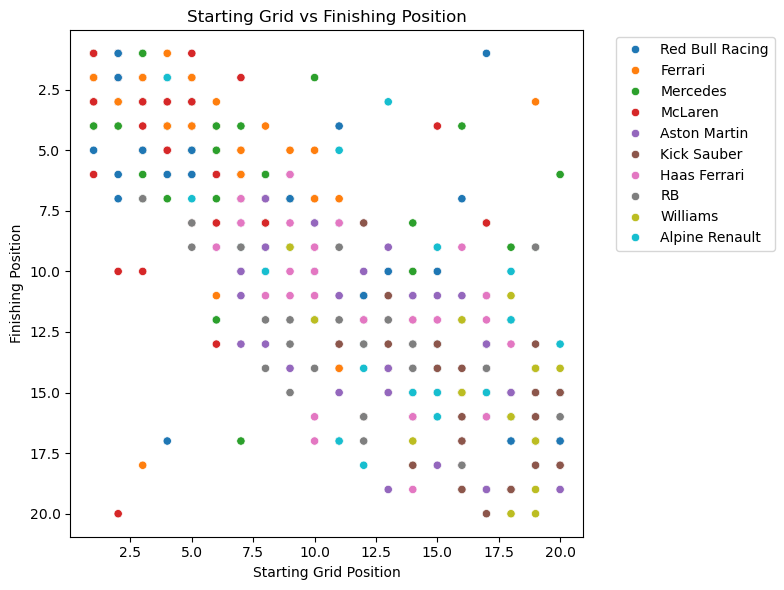

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=race_results_clean, x='Starting Grid', y='Position', hue='Team')
plt.gca().invert_yaxis()  # Position 1 at top
plt.title('Starting Grid vs Finishing Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Finishing Position')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Starting Grid vs Finishing Position.png', dpi=200, bbox_inches='tight')
plt.show()


___  
##### 4. Team average finishing position per track heatmap

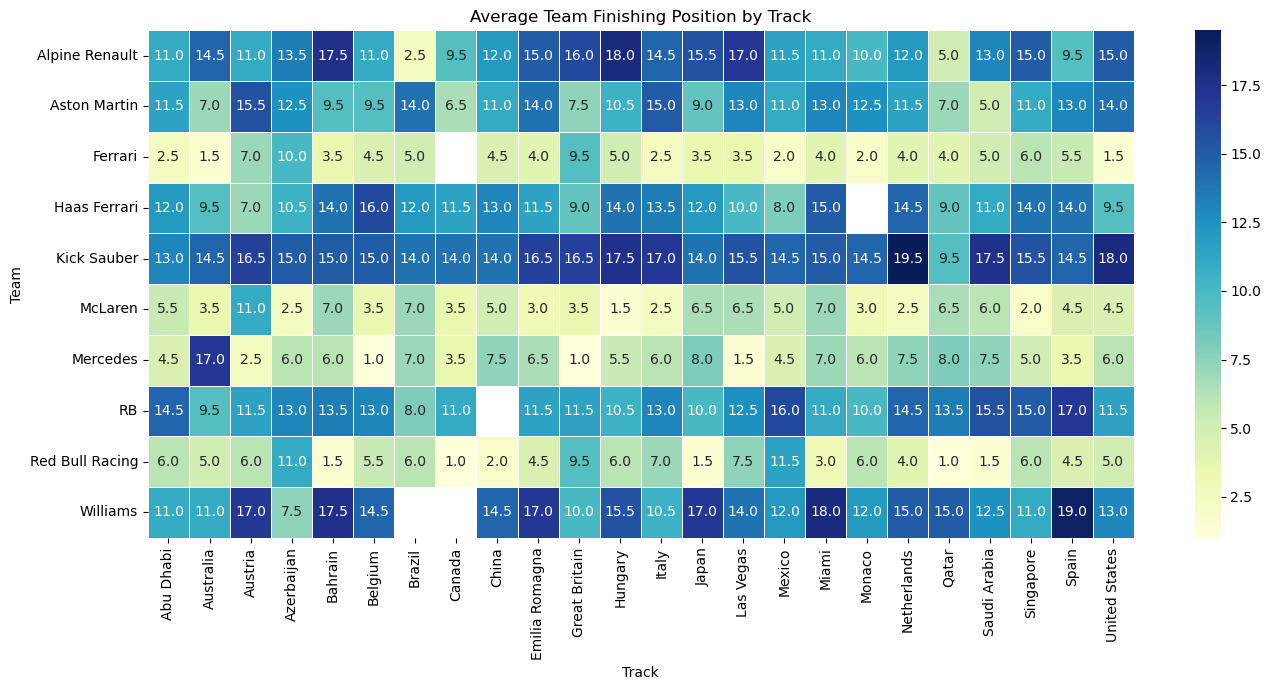

In [11]:
team_track = race_results_clean.pivot_table(index='Team', columns='Track', values='Position', aggfunc='mean')

plt.figure(figsize=(14, 7))
sns.heatmap(team_track, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Average Team Finishing Position by Track')
plt.xlabel('Track')
plt.ylabel('Team')
plt.tight_layout()
plt.savefig('Average Team Finish.png', dpi=200, bbox_inches='tight')
plt.show()

___
##### 5. Driver points per track heatmap

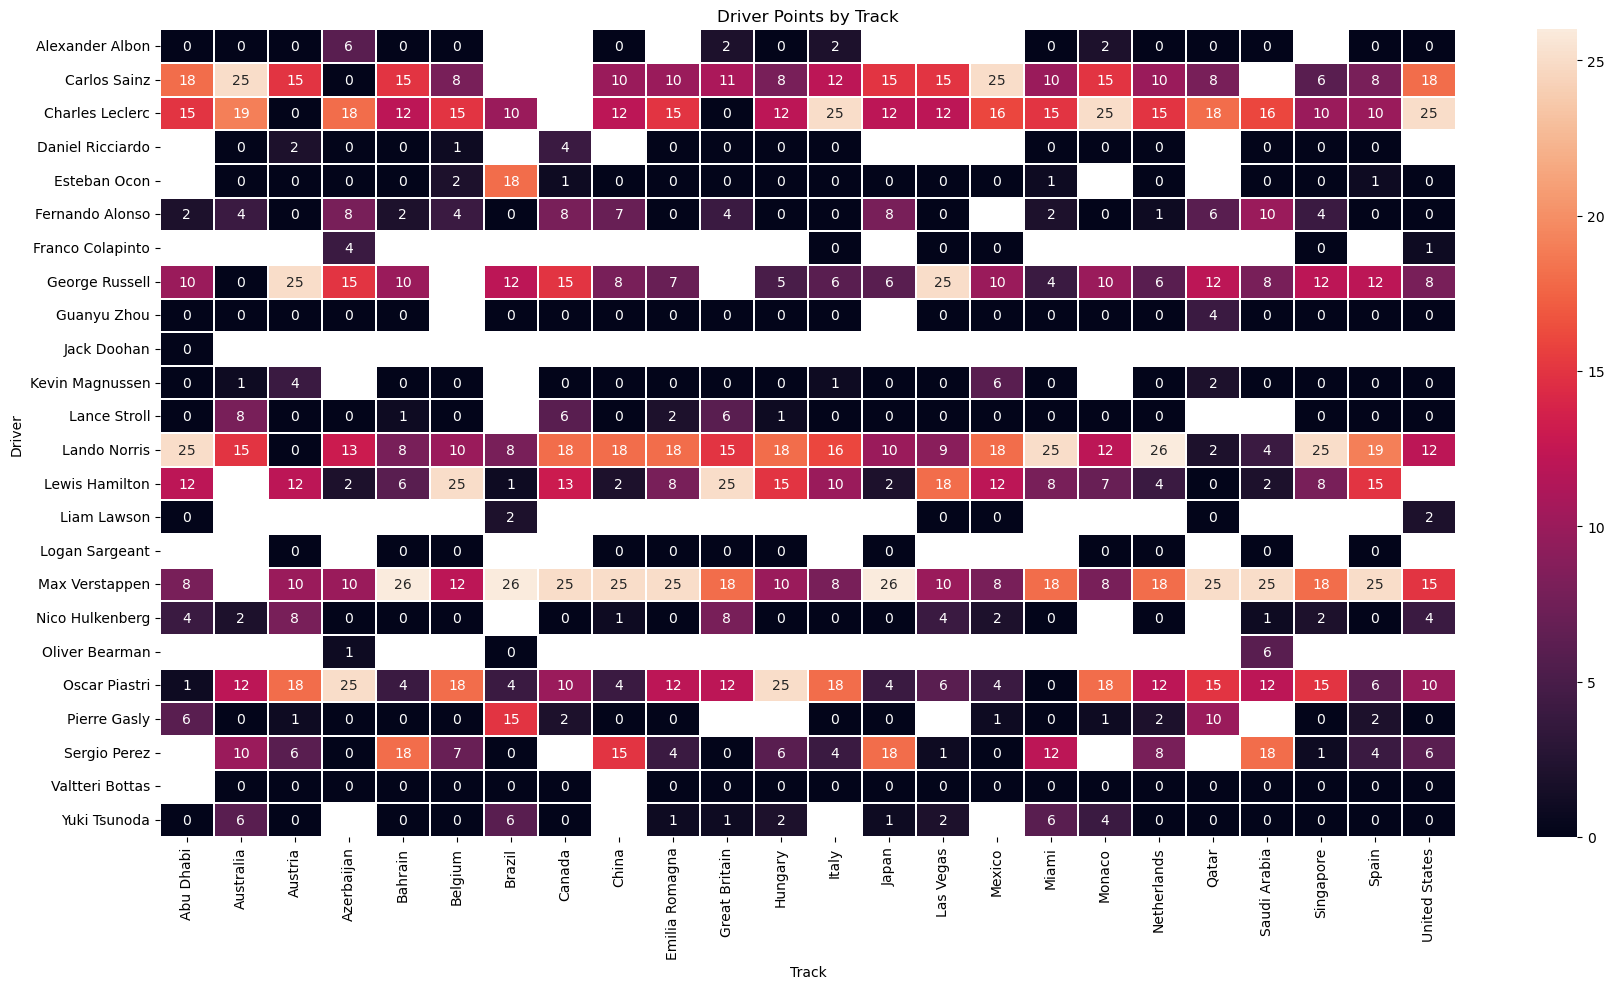

In [12]:
driver_track = race_results_clean.pivot_table(index='Driver', columns='Track', values='Points', aggfunc='sum')

plt.figure(figsize=(18, 10))
sns.heatmap(driver_track, annot=True, fmt='.0f', cmap='rocket', linewidths=.3)
plt.title('Driver Points by Track')
plt.xlabel('Track')
plt.ylabel('Driver')
plt.tight_layout()
plt.savefig('Driver Points by Track.png', dpi=200, bbox_inches='tight')
plt.show()

___  
##### 6. Driver Popularity Analysis and Visualization.

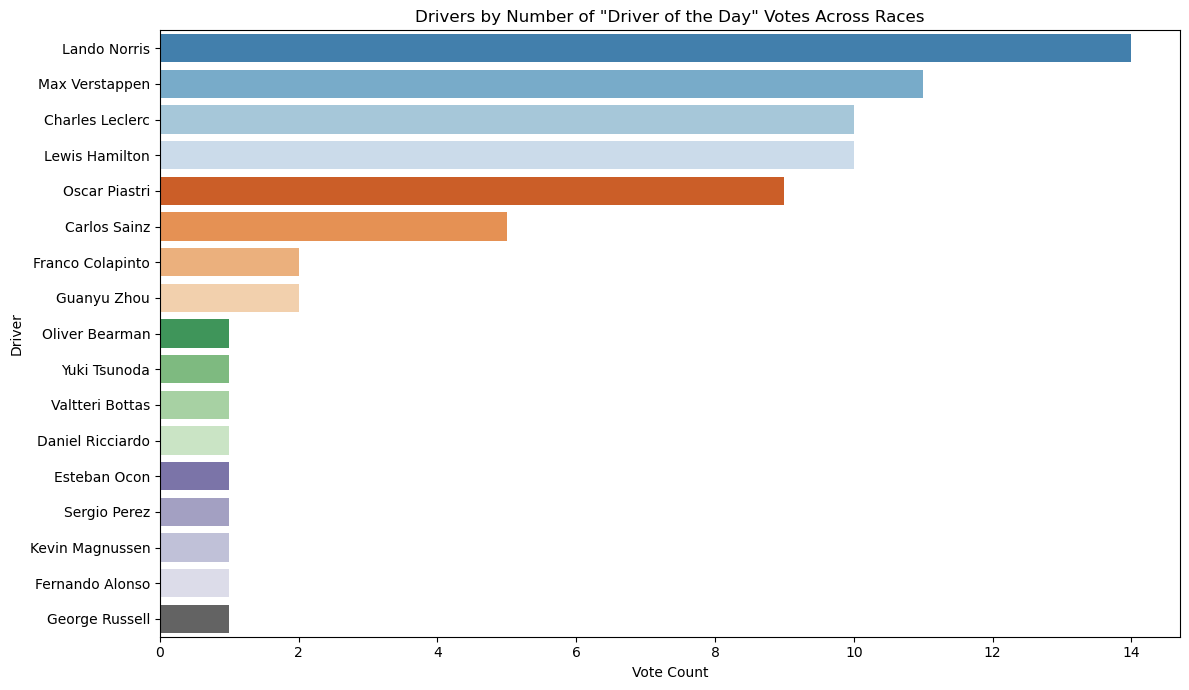

In [13]:
# Reshape the driver votes
votes_long = pd.melt(driver_votes, id_vars=['Track'], 
                     value_vars=['1st Place', '2nd Place', '3rd Place'],
                     var_name='Vote Rank', value_name='Driver')

vote_counts = votes_long['Driver'].value_counts()

#Vizualization
'''plt.figure(figsize=(12,7))
sns.barplot(x=vote_counts.values, y=vote_counts.index, palette='pastel')
plt.title('Drivers by Number of "Driver of the Day" Votes Across Races')
plt.xlabel('Vote Count')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()'''

##I've provided a new code below rectifying the future warning: Please go through my Future warning explaination at bottom of notebook.
df_drivpop = pd.DataFrame({
	'Driver' : vote_counts.index,
	'Vote Count' : vote_counts.values
})
plt.figure(figsize=(12,7))
sns.barplot(x='Vote Count', y='Driver', data=df_drivpop, hue='Driver' , palette ='tab20c', dodge=False, legend=False)
plt.title('Drivers by Number of "Driver of the Day" Votes Across Races')
plt.xlabel('Vote Count')
plt.ylabel('Driver')
plt.tight_layout()
plt.savefig('Driver of the Day.png', dpi=200, bbox_inches='tight')
plt.show()


### Conclusions and Insights from the 2024 Formula 1 Season Data

#### Who led the points championship in 2024?

Max Verstappen dominated the 2024 championship in terms of points and race wins, consistently finishing at or near the front. His high tally of points and multiple victories positioned him as the clear leader throughout the season.

***

#### Which teams showed consistent performance?

Red Bull Racing and McLaren demonstrated strong, consistent performances. Red Bull, led by Verstappen and Perez, collected many podiums and points. McLaren, powered by Lando Norris and Oscar Piastri, also delivered frequent points finishes and competitive qualifying results, showing reliability and solid team strategy. Ferrari performed well but had slightly less consistency compared to these two.

***

#### How does starting grid affect finishing?

Starting position on the grid strongly correlates with race finishing position, especially on circuits where overtaking is difficult. Front-row starters, such as Verstappen and Leclerc, often maintained top finishing positions. However, some drivers like Lando Norris and Oscar Piastri showed skillful racecraft by gaining places from mid-grid starts. Overall, a better grid slot increases chances of scoring points, but race incidents and strategy remain decisive factors.

***

#### Are fans' favorite drivers aligned with top performers?

Generally, there is strong alignment between fan-voted Drivers of the Day and top season performers. Frequent fan favorites include Charles Leclerc, Lando Norris, and Max Verstappen, reflecting their on-track impact and popularity. Some emerging talents like Oscar Piastri and Franco Colapinto also gained notable fan support, highlighting growing interest beyond established stars.

***

#### Interesting anomalies or patterns from heatmaps

- Some mid-pack drivers, like Franco Colapinto and Oliver Bearman, consistently attracted a high share of fan votes despite lower championship standings, indicating a fan appreciation for standout individual performances.
- Heatmaps of qualifying vs. race positions revealed that a few drivers regularly gained significant places during a race weekend, pointing to strong race pace or strategic overtakes.
- Occasional underperformances by championship contenders in qualifying but rebounds in races pointed to strategic focus on race setup over qualifying speed.

***

This analysis reveals a championship shaped by dominance at the front, consistent teams overcoming complex race dynamics, alignment between fan sentiment and sporting performance, and intriguing narratives from the midfield highlighting the depth and excitement of Formula 1 in 2024.

<center><h3>Dashboard</h3></center>


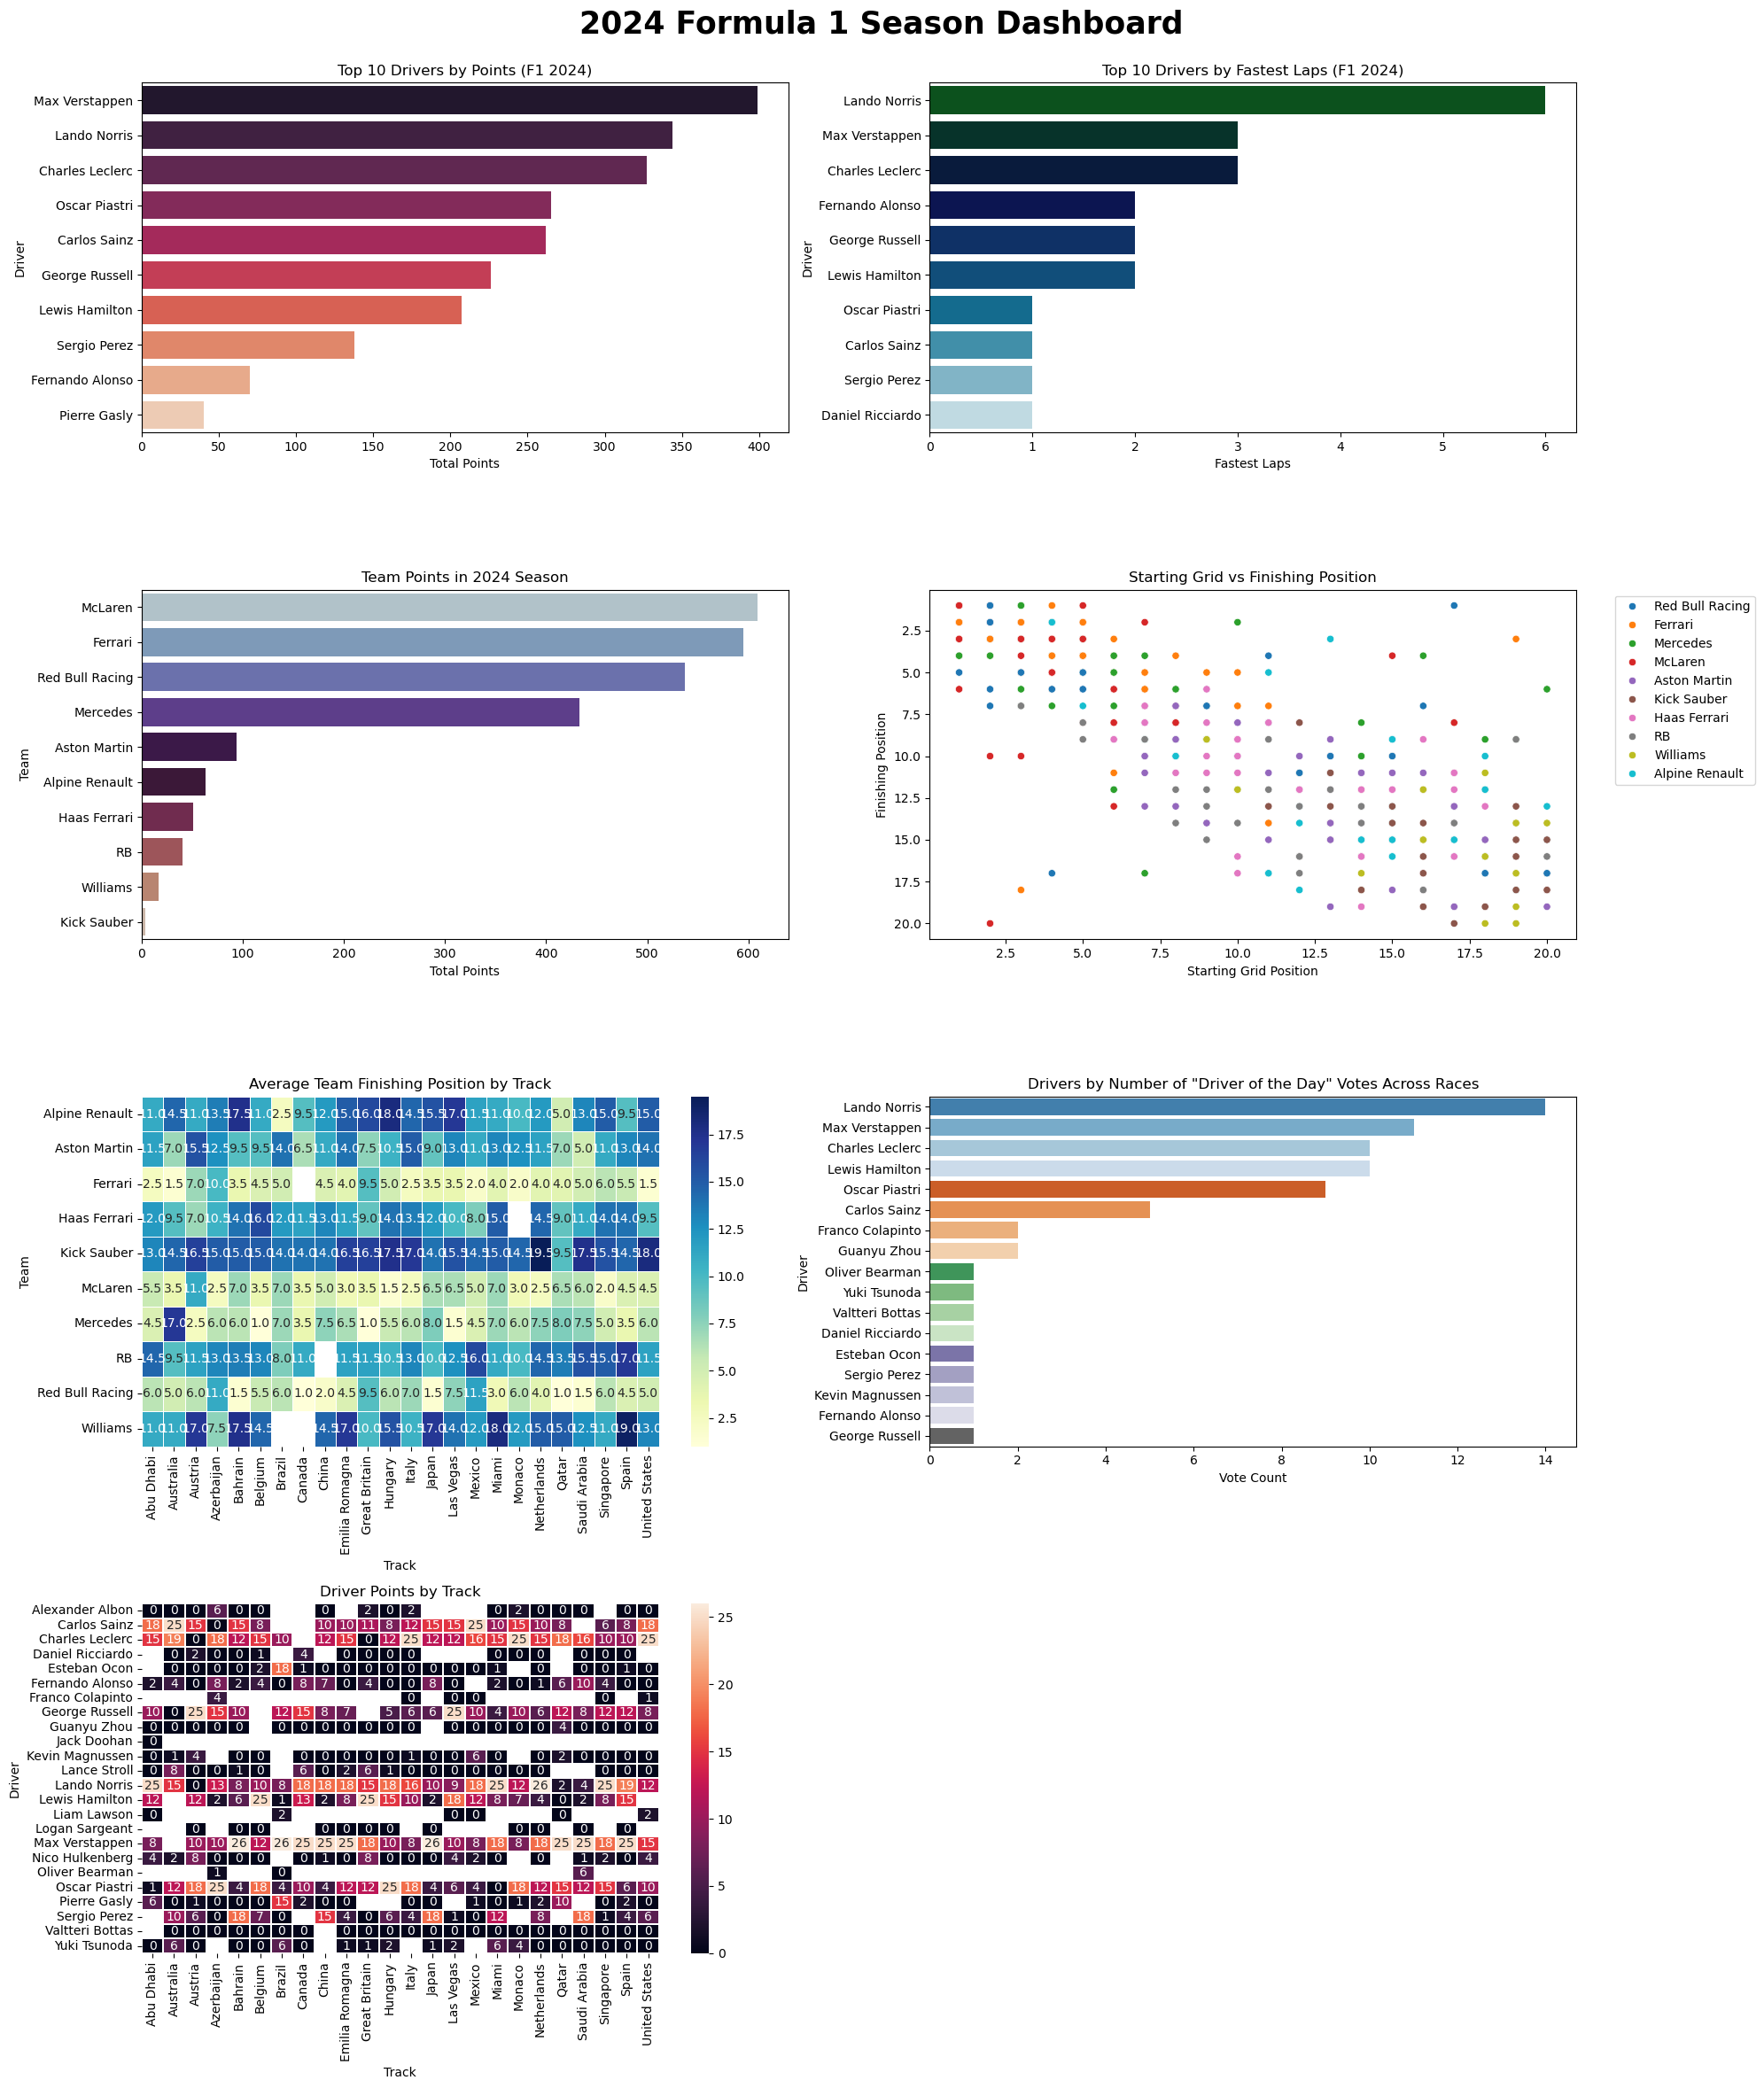

In [14]:
# Load datasets
race_results = pd.read_csv('Formula1_2024season_raceResults.csv')
drivers = pd.read_csv('Formula1_2024season_drivers.csv')
calendar = pd.read_csv('Formula1_2024season_calendar.csv')
driver_votes = pd.read_csv('Formula1_2024season_driverOfTheDayVotes.csv')
teams = pd.read_csv('Formula1_2024season_teams.csv')

# Data Cleaning and Preparation
for col in ['Points', 'Position', 'Starting Grid']:
    race_results[col] = pd.to_numeric(race_results[col], errors='coerce')

race_results_clean = race_results.dropna(subset=['Driver', 'Team', 'Points', 'Position', 'Starting Grid'])

team_name_map = {
    'Red Bull Racing Honda RBPT': 'Red Bull Racing',
    'McLaren Mercedes': 'McLaren',
    'Aston Martin Aramco Mercedes': 'Aston Martin',
    'Williams Mercedes': 'Williams',
    'Kick Sauber Ferrari': 'Kick Sauber',
    'RB Honda RBPT': 'RB'
}
race_results_clean.loc[:, 'Team'] = race_results_clean['Team'].str.strip().replace(team_name_map)

driver_points = race_results_clean.groupby('Driver')['Points'].sum().sort_values(ascending=False)
fastest_laps = race_results_clean[race_results_clean['Set Fastest Lap'] == 'Yes']
fastest_lap_counts = fastest_laps['Driver'].value_counts()
team_points = race_results_clean.groupby('Team')['Points'].sum().sort_values(ascending=False)

votes_long = pd.melt(driver_votes, id_vars=['Track'], 
                     value_vars=['1st Place', '2nd Place', '3rd Place'],
                     var_name='Vote Rank', value_name='Driver')

# Pivot for heatmaps
team_track = race_results_clean.pivot_table(index='Team', columns='Track', values='Position', aggfunc='mean')
driver_track = race_results_clean.pivot_table(index='Driver', columns='Track', values='Points', aggfunc='sum')

# Create subplots: 4 rows, 2 columns
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.flatten()

# Plot 1: Top 10 Drivers by Points
df_top10 = pd.DataFrame({'Driver': driver_points.head(10).index, 'Points': driver_points.head(10).values})
sns.barplot(x='Points', y='Driver', data=df_top10, hue='Driver', palette='rocket', dodge=False, legend=False, ax=axes[0])
axes[0].set_title('Top 10 Drivers by Points (F1 2024)')
axes[0].set_xlabel('Total Points')
axes[0].set_ylabel('Driver')

# Plot 2: Top 10 Drivers by Fastest Laps
df_topfast = pd.DataFrame({'Driver': fastest_lap_counts.head(10).index, 'Fastest Laps': fastest_lap_counts.head(10).values})
sns.barplot(x='Fastest Laps', y='Driver', data=df_topfast, hue='Driver', palette='ocean', dodge=False, legend=False, ax=axes[1])
axes[1].set_title('Top 10 Drivers by Fastest Laps (F1 2024)')
axes[1].set_xlabel('Fastest Laps')
axes[1].set_ylabel('Driver')

# Plot 3: Team Points in 2024 Season
df_teamperf = pd.DataFrame({'Team': team_points.index, 'Total Points': team_points.values})
sns.barplot(x='Total Points', y='Team', data=df_teamperf, hue='Team', palette='twilight', dodge=False, legend=False, ax=axes[2])
axes[2].set_title('Team Points in 2024 Season')
axes[2].set_xlabel('Total Points')
axes[2].set_ylabel('Team')

# Plot 4: Starting Grid vs Finishing Position
sns.scatterplot(data=race_results_clean, x='Starting Grid', y='Position', hue='Team', ax=axes[3])
axes[3].invert_yaxis()
axes[3].set_title('Starting Grid vs Finishing Position')
axes[3].set_xlabel('Starting Grid Position')
axes[3].set_ylabel('Finishing Position')
axes[3].legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Plot 5: Average Team Finishing Position by Track (Heatmap)
sns.heatmap(team_track, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5, ax=axes[4])
axes[4].set_title('Average Team Finishing Position by Track')
axes[4].set_xlabel('Track')
axes[4].set_ylabel('Team')

# Plot 6: Drivers by Number of "Driver of the Day" Votes
vote_counts = votes_long['Driver'].value_counts()
df_drivpop = pd.DataFrame({'Driver': vote_counts.index, 'Vote Count': vote_counts.values})
sns.barplot(x='Vote Count', y='Driver', data=df_drivpop, hue='Driver', palette='tab20c', dodge=False, legend=False, ax=axes[5])
axes[5].set_title('Drivers by Number of "Driver of the Day" Votes Across Races')
axes[5].set_xlabel('Vote Count')
axes[5].set_ylabel('Driver')

# Plot 7: Driver Points by Track (Heatmap)
sns.heatmap(driver_track, annot=True, fmt='.0f', cmap='rocket', linewidths=.3, ax=axes[6])
axes[6].set_title('Driver Points by Track')
axes[6].set_xlabel('Track')
axes[6].set_ylabel('Driver')

# Hide unused subplot (8th plot not used)
axes[7].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('2024 Formula 1 Season Dashboard', fontsize=25, fontweight='bold')
plt.savefig('f1_dashboard_2024.png', dpi=300, bbox_inches='tight')
plt.show()


___
<center><h1>Thank You !</h1></center>

##### Future Warning Explaination  
---  

The FutureWarning in seaborn comes when you utilize the palette option without designating a hue variable in your barplot code. This indicates that seaborn requires a category (the hue) to select colors from the palette, rather than randomly coloring all bars.  

Below code produces Future Warning (Try running the commented codes above to see the Future Warning):  
***sns.barplot(x='Points', y='Driver', data=df, palette='viridis')***  

Reason for Future Warning in above code: will show the warning because palette is set, but no hue.  

Fix for the Future Warning: Add a hue argument that matches your category, like 'Driver' or 'Team'.  
***sns.barplot(x='Points', y='Driver', data=df, hue='Driver', palette='viridis', dodge=False, legend=False)***  
Seaborn now knows to color each bar according to the 'Driver' category, using colors from the palette. No warning will appear.

Below is a quick reference to avoid Future Warning:  
1. Different colors per bar --> Use hue + palette
2. All bars same color --> Use color (not palette)